In [1]:
from gaspy.tasks.db_managers import catalog
from pymatgen import MPRester
from gaspy.utils import read_rc
from gaspy.tasks.core import schedule_tasks, get_task_output
matproj_api_key = 'B7pkHxCQtALPzGRy'

successfully loaded your custom FW_config.yaml!


In [2]:
import pickle
# Load pickle
with open('/global/project/projectdirs/m2755/sback/materials-project/01_collect_mpid_structure/all_mpid_structures.pkl', 'rb') as openfile:
    structures = pickle.load(openfile)

with open('/global/project/projectdirs/m2755/sback/materials-project/01_collect_mpid_structure/all_mpid_list.pkl', 'rb') as openfile:
    mpids = pickle.load(openfile)
    


# Filtering Criteria (The number of elements equals to 2)

In [3]:
#  The number of elements: 2

from pymatgen.io.ase import AseAtomsAdaptor

symbols = []
numbers = []
ase_structures = []


for mpid, structure in zip(mpids, structures):
    atoms = AseAtomsAdaptor.get_atoms(structure)
    ase_structures.append(atoms)
    symbol = []
    for atom in atoms:
        symbol.append(atom.symbol)
    set_symbol = list(set(symbol))
    symbols.append(set(symbol))
    numbers.append(len(set(symbol)))


In [4]:
len(symbols), len(numbers), len(ase_structures)

(11476, 11476, 11476)

In [5]:
import seaborn as sns

numbers.count(1), numbers.count(2), numbers.count(3), numbers.count(4), numbers.count(5), numbers.count(6), numbers.count(7), numbers.count(8), numbers.count(9)

(47, 3568, 6251, 1308, 302, 0, 0, 0, 0)

In [6]:
max(numbers)

5

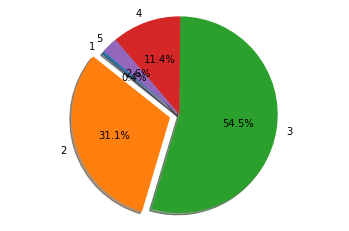

In [7]:
import matplotlib.pyplot as plt

# Data to plot
labels = [1,2,3,4,5]
count = [numbers.count(1), numbers.count(2), numbers.count(3), numbers.count(4), numbers.count(5)]
explode = (0,0.1,0,0,0)  # explode 1st slice

# Plot
plt.pie(count, explode=explode, labels=labels, #colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [8]:
import pandas as pd

df = pd.DataFrame()
df['mpid'] = mpids
df['atoms'] = ase_structures
df['numbers'] = numbers
df['symbols'] = symbols

In [9]:
df.to_csv('all_summarized_df.csv')

In [10]:
mask = df['numbers'] == 2
mpid_2 = df[mask]


In [11]:
mpid_2_list = [i for i in mpid_2['mpid']]
symbols_2_list = [list(i) for i in mpid_2['symbols']]

In [12]:
# input for the function

zipped = [[i,j] for i,j in zip(mpid_2_list,symbols_2_list)]

In [13]:
mpid_2

,mpid,atoms,numbers,symbols
0,mp-1226103,"(Atom('Co', [3.5001054753889607, 0.43368565792...",2,"{B, Co}"
2,mp-786,"(Atom('Mn', [0.0, 0.0, 0.0], index=0), Atom('M...",2,"{Sb, Mn}"
7,mp-1220401,"(Atom('Nb', [-1.7092571070925708, -1.548798044...",2,"{Nb, Pd}"
9,mp-1186985,"(Atom('Sc', [0.0, 0.0, 0.0], index=0), Atom('N...",2,"{Sc, Ni}"
11,mp-976273,"(Atom('Hf', [0.0, 0.0, 0.0], index=0), Atom('H...",2,"{Ge, Hf}"
21,mp-1220645,"(Atom('Nb', [-1.75618053, -1.6421842470039005,...",2,"{Au, Nb}"
33,mp-972876,"(Atom('Sc', [-3.0285163403753756e-06, 1.874121...",2,"{Sc, Cd}"
34,mp-1186013,"(Atom('Mn', [2.7925798284818204, 1.61229626458...",2,"{Pd, Mn}"
35,mp-1080603,"(Atom('Fe', [-2.86057152, 0.0, 0.0], index=0),...",2,"{Fe, Co}"
44,mp-684690,"(Atom('Sc', [6.247548053690656, 5.735423484119...",2,"{Sc, Se}"


In [14]:
mpid_2.to_csv('filtered_df.csv')

In [4]:


# input for the function
mpid_2_list = [i for i in mpid_2['mpid']]
symbols_2_list = [list(i) for i in mpid_2['symbols']]

zipped = [[i,j] for i,j in zip(mpid_2_list,symbols_2_list)]

# Filtering by Pourbaix diagram (0.7 V at pH=0, 7, 14) (Do this in GPU cluster using the newest pymatgen)

In [15]:
import pymatgen

pymatgen.__version__

'2019.7.30'

In [16]:
#https://matgenb.materialsvirtuallab.org/2017/12/15/Plotting-a-Pourbaix-Diagram.html

# Import necessary tools from pymatgen
from pymatgen import MPRester
from pymatgen.analysis.pourbaix_diagram import PourbaixDiagram, PourbaixPlotter

# Initialize the MP Rester
mpr = MPRester("B7pkHxCQtALPzGRy")


In [17]:
from joblib import Memory


#Separate this out so it can be cached (most time intensive part, and is done for every element combination)
def make_pourbaix(entry_atoms):
    entries = mpr.get_pourbaix_entries([i for i in entry_atoms])
    # Construct the PourbaixDiagram object
    pbx = PourbaixDiagram(entries)
    return entries, pbx

#Define a local cached version so that the result gets returned if the element combination 
# has already been considered
memory = Memory('./cachedir', verbose=0)
make_pourbaix_cached = memory.cache(make_pourbaix)



In [18]:
#The actual analysis part, fast
def pourbaix(i): # input is zipped list
    mpid = i[0]
    symbol = i[1]
    stability = [] # acid, neut, base   
    entries, pbx = make_pourbaix_cached(symbol)
    
    # Get an entry stability as a function of pH and V
    entry = [e for e in entries if e.entry_id == mpid][0]
    # Stability at three conditions
    acid="{:0.2f}".format(pbx.get_decomposition_energy(entry, pH=0, V=0.7)) # basic condition, pH=0, 0.7 V RHE
    neut="{:0.2f}".format(pbx.get_decomposition_energy(entry, pH=7, V=0.287)) # basic condition, pH=7, 0.7 V RHE
    base="{:0.2f}".format(pbx.get_decomposition_energy(entry, pH=14, V=-.126)) # basic condition, pH=14, 0.7 V RHE
    stability.append([acid, neut, base])
    
    return stability

In [19]:
import multiprocess as mp
import tqdm.notebook as tqdm

#Parallel computation, lots of thread probably ok since probably network bound. This will be very fast if the result
# is already cached
with mp.Pool(32) as pool:
    results = list(tqdm.tqdm(pool.imap(pourbaix, zipped), total=len(zipped)))
    

In [22]:
acid = []
neut = []
base = []

for i in results:
    acid.append(float(i[0][0]))
    neut.append(float(i[0][1]))
    base.append(float(i[0][2]))

In [25]:
mpid_2['acid_stability'] = acid
mpid_2['neut_stability'] = neut
mpid_2['base_stability'] = base

mpid_2

In [41]:
# Loose criteria

mask = (mpid_2['acid_stability'] < 1.0) | (mpid_2['neut_stability'] < 1.0) | (mpid_2['base_stability'] < 1.0)
stable = mpid_2[mask]

In [44]:
stable

,mpid,atoms,numbers,symbols,acid_stability,neut_stability,base_stability
0,mp-1226103,"(Atom('Co', [3.5001054753889607, 0.43368565792...",2,"{B, Co}",1.19,0.78,1.12
34,mp-1186013,"(Atom('Mn', [2.7925798284818204, 1.61229626458...",2,"{Pd, Mn}",0.71,0.52,0.48
35,mp-1080603,"(Atom('Fe', [-2.86057152, 0.0, 0.0], index=0),...",2,"{Fe, Co}",1.49,0.92,1.12
53,mp-7818,"(Atom('Se', [2.657403265, 2.657403265, 2.88119...",2,"{Pd, Se}",0.09,0.09,0.17
55,mp-569776,"(Atom('Ta', [1.7285772551416134, 3.838046955, ...",2,"{Ta, Ni}",1.54,0.93,0.89
79,mp-21657,"(Atom('Se', [2.1486290825, 2.1486290825, 6.443...",2,"{Se, Tl}",0.58,0.38,0.46
101,mp-1226736,"(Atom('Cd', [0.0, 0.0, 0.0], index=0), Atom('A...",2,"{Cd, Ag}",0.70,0.35,0.24
161,mp-1225656,"(Atom('Cu', [0.0, 0.0, 0.0], index=0), Atom('P...",2,"{Pd, Cu}",0.77,0.38,0.39
207,mp-1115,"(Atom('Se', [1.880512415471791, 1.085714325809...",2,"{Se, Pt}",0.13,0.13,0.38
208,mp-1103235,"(Atom('Cu', [3.31092018, 3.31092018, 0.0], ind...",2,"{Te, Cu}",1.31,0.84,1.26


In [43]:
stable.to_csv('pourbaix_stable.csv')

In [40]:
from ase.io import write

for index, row in stable.iterrows():
    write('/global/homes/s/sback/m2755/sback/materials-project/02_filter/stable_structures/'+str(index)+'.cif', row['atoms'])

# To plot Pourbaix diagram

In [ ]:
# Get all pourbaix entries corresponding to the chemical system of interest (don't need to include H or O)
entries = mpr.get_pourbaix_entries(['Ni'])
# Construct the PourbaixDiagram object
pbx = PourbaixDiagram(entries)
# Get an entry stability as a function of pH and V
entry = [e for e in entries if e.entry_id == 'mp-753890'][0]
## Below is to plot pourbaix diagram. Don't need this now.
plotter = PourbaixPlotter(pbx)
plt = plotter.plot_entry_stability(entry)
plt.show()
         